## 기본 라이브러리 불러오기

In [1]:
# 라이브러리 임포트
import os
import pandas as pd
import chardet

# 사용자 정의함수 경로 설정
import sys
sys.path.append("G:/내 드라이브/Source/_Custom_Function")
# 사용자 정의함수 불러오기

import time

import ExcelFile_Merge as em
import ExcelFile_Read as er
import ExcelFile_EDA as ee

## 기본 데이터 불러오기

### 서울특별시 공공자전거 대여이력 정보

In [4]:
start_time = time.time()
_columns = ['자전거번호', '대여일자', '대여시간차', '대여대여소번호', '반납대여소번호']
df_BikeRent_2023 = pd.read_parquet('G:\\내 드라이브\\DataSet\\_파킷 파일\\서울특별시 공공자전거 대여이력 정보\\서울특별시 공공자전거 대여이력 정보_2023_preprocessed.parquet', columns = _columns)
print("read_csv time :", time.time() - start_time)

read_csv time : 11.526427745819092


In [5]:
start_time = time.time()
_columns = ['자전거번호', '대여일자', '대여시간차', '대여대여소번호', '반납대여소번호']
df_BikeRent_2024 = pd.read_parquet('G:\\내 드라이브\\DataSet\\_파킷 파일\\서울특별시 공공자전거 대여이력 정보\\서울특별시 공공자전거 대여이력 정보_2024_preprocessed.parquet', columns = _columns)
print("read_csv time :", time.time() - start_time)

read_csv time : 6.1362669467926025


In [7]:
df_BikeRent = pd.concat([df_BikeRent_2023, df_BikeRent_2024], axis=0)

In [8]:
print(f'df_BikeRent_2023.shape[0] : {df_BikeRent_2023.shape[0]}')
print(f'df_BikeRent_2024.shape[0] : {df_BikeRent_2024.shape[0]}')
print(f'df_BikeRent.shape[0] : {df_BikeRent.shape[0]}')

df_BikeRent_2023.shape[0] : 45363848
df_BikeRent_2024.shape[0] : 21621807
df_BikeRent.shape[0] : 66985655


In [9]:
df_BikeRent.info()

<class 'pandas.core.frame.DataFrame'>
Index: 66985655 entries, 0 to 22107539
Data columns (total 5 columns):
 #   Column   Dtype          
---  ------   -----          
 0   자전거번호    object         
 1   대여일자     object         
 2   대여시간차    timedelta64[ns]
 3   대여대여소번호  object         
 4   반납대여소번호  object         
dtypes: object(4), timedelta64[ns](1)
memory usage: 3.0+ GB


In [10]:
df_BikeRent.head(2)

,자전거번호,대여일자,대여시간차,대여대여소번호,반납대여소번호
0,SPB-39194,2023-01-01,0 days 00:00:30,01554,01554
1,SPB-43457,2023-01-01,0 days 00:02:08,01653,04003


In [11]:
df_BikeRent.shape[0]

66985655

---
### df_BikeRent 의 데이터를 조건에 재조회
- 대여시간차가 5분 미만인 데이터
- 대여 대여소 번호와 반납 대여소 번호가 동일한 데이터

In [20]:
# 대여일자를 날짜 형식으로 변환
df_BikeRent['대여일자'] = pd.to_datetime(df_BikeRent['대여일자'])

In [21]:
# 1. 조건에 따라 필터링: 대여시간차가 5분 미만, 대여 대여소 번호와 반납 대여소 번호가 동일한 데이터만 선택
cond1 = df_BikeRent['대여시간차'] < pd.Timedelta(minutes=5)
cond2 = df_BikeRent['대여대여소번호'] == df_BikeRent['반납대여소번호']
df_BikeRent_2 = df_BikeRent[cond1 & cond2].copy()

In [22]:
df_BikeRent_2.shape[0]

2254881

In [26]:
# 2023.09.01 ~ 2024.06.30
# 이상패턴 횟수 - 조회용
df_BikeRent230901_230630 = df_BikeRent_2[df_BikeRent_2['대여일자'].between('2023-11-01', '2024-06-30')]
# 2024.01.01 ~ 2024.06.30
# 정상 자전거번호 확인용
df_BikeRent240101_240630 = df_BikeRent_2[df_BikeRent_2['대여일자'].between('2024-01-01', '2024-06-30')]

In [28]:
print(f'df_BikeRent230901_230630.shape[0] : {df_BikeRent230901_230630.shape[0]}')
print(f'df_BikeRent240101_240630.shape[0] : {df_BikeRent240101_240630.shape[0]}')

df_BikeRent230901_230630.shape[0] : 884655
df_BikeRent240101_240630.shape[0] : 714084


### 서울시 공공자전거 고장신고 내역

In [31]:
start_time = time.time()
df_BikeBroken = pd.read_parquet('G:\\내 드라이브\\DataSet\\_최종 병합 파일\\서울시 공공자전거 고장신고 내역_15-24.06.parquet')
print("read_csv time :", time.time() - start_time)

read_csv time : 0.35893750190734863


In [33]:
df_BikeBroken.head(3)

,자전거번호,고장구분,등록일자,등록시간
0,SPB-00108,체인,2015-12-04,07:41:01
1,SPB-00210,체인,2015-12-07,12:23:33
2,SPB-00035,기타,2015-12-09,17:07:00


In [35]:
df_BikeBroken.shape[0]

767715

---
1. 2024년 고장신고내역의 자전거번호를 구한다.
2. 2024년 자전거대여이력의 자전거번호를 구한다.
3. 

---
### 2024년 고장이력만 조회
- 등록일자 : 2024-01-01 ~ 2024-06-30

In [37]:
df_BikeBroken2 = df_BikeBroken[df_BikeBroken['등록일자'].between('2024-01-01', '2024-12-31')]

In [39]:
print(f'df_BikeBroken.shape[0] {df_BikeBroken.shape[0]}')
print(f'df_BikeBroken2.shape[0] {df_BikeBroken2.shape[0]}')

df_BikeBroken.shape[0] 767715
df_BikeBroken2.shape[0] 76463


In [41]:
df_BikeBroken2['자전거번호'].unique()

<StringArray>
['SPB-40704', 'SPB-65171', 'SPB-44316', 'SPB-31539', 'SPB-51998', 'SPB-38568',
 'SPB-68235', 'SPB-44078', 'SPB-66158', 'SPB-45102',
 ...
 'SPB-64200', 'SPB-42922', 'SPB-69655', 'SPB-39650', 'SPB-38653', 'SPB-62989',
 'SPB-31854', 'SPB-62325', 'SPB-62654', 'SPB-35527']
Length: 28589, dtype: string

In [43]:
df_BikeBroken2['자전거번호'].value_counts()

자전거번호
SPB-30296    24
SPB-70298    23
SPB-31172    21
SPB-41406    21
SPB-33626    19
             ..
SPB-60257     1
SPB-40210     1
SPB-59161     1
SPB-32403     1
SPB-35527     1
Name: count, Length: 28589, dtype: Int64

In [45]:
# 2024-01-01 ~ 2024-06-30	
df_BikeBroken2.sort_values(by = '등록일자', ascending = True).head(2)

,자전거번호,고장구분,등록일자,등록시간
691252,SPB-40704,단말기,2024-01-01,03:57:03
691351,SPB-66424,체인,2024-01-01,18:45:08


In [47]:
df_BikeBroken2[df_BikeBroken2['자전거번호'] == 'SPB-30296'].sort_values(by = '등록일자', ascending = False).head(2)

,자전거번호,고장구분,등록일자,등록시간
752797,SPB-30296,기타,2024-06-06,14:51:27
752796,SPB-30296,체인,2024-06-06,14:51:27


---
### 자전거고장신고내역에서
- 자전거번호' 별로 가장마지막 신고내역만 가져오기

In [49]:
# 등록일자를 datetime 형식으로 변환
df_BikeBroken2['등록일자'] = pd.to_datetime(df_BikeBroken2['등록일자'])

# 자전거번호 별로 가장 최근 등록일자를 가진 행 추출
df_BikeBroken_latest = df_BikeBroken2.loc[df_BikeBroken2.groupby('자전거번호')['등록일자'].idxmax()]

# 이전일자 컬럼 생성 (등록일자보다 한 달 전)
# df_BikeBroken_latest['이전일자'] = df_BikeBroken_latest['등록일자'] - pd.DateOffset(months=1)
df_BikeBroken_latest['이전일자'] = df_BikeBroken_latest['등록일자'] - pd.DateOffset(days=15)

C:\Users\user\AppData\Local\Temp\ipykernel_6524\133365777.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_BikeBroken2['등록일자'] = pd.to_datetime(df_BikeBroken2['등록일자'])


In [51]:
df_BikeBroken_latest.head(2)

,자전거번호,고장구분,등록일자,등록시간,이전일자
714016,SPB-30006,페달,2024-03-31,23:48:49,2024-03-16
760656,SPB-30010,타이어,2024-06-18,18:37:09,2024-06-03


In [53]:
df_BikeBroken_latest = df_BikeBroken_latest[['자전거번호', '고장구분', '이전일자', '등록일자']]

In [55]:
df_BikeBroken_latest.head(2)

,자전거번호,고장구분,이전일자,등록일자
714016,SPB-30006,페달,2024-03-16,2024-03-31
760656,SPB-30010,타이어,2024-06-03,2024-06-18


#### 고장난 자전기 가져오기

In [58]:
df_BikeBroken_latest['자전거번호'].unique()

<StringArray>
['SPB-30006', 'SPB-30010', 'SPB-30014', 'SPB-30018', 'SPB-30022', 'SPB-30024',
 'SPB-30026', 'SPB-30031', 'SPB-30036', 'SPB-30037',
 ...
 'SPB-84955', 'SPB-84963', 'SPB-84968', 'SPB-84974', 'SPB-84984', 'SPB-84988',
 'SPB-84989', 'SPB-84993', 'SPB-84995', 'SPB-84996']
Length: 28589, dtype: string

In [60]:
df_BikeBroken_latest.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28589 entries, 714016 to 737981
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   자전거번호   28589 non-null  string        
 1   고장구분    28589 non-null  string        
 2   이전일자    28589 non-null  datetime64[ns]
 3   등록일자    28589 non-null  datetime64[ns]
dtypes: datetime64[ns](2), string(2)
memory usage: 1.1 MB


In [62]:
# 2024.01.01 ~ 2024.06.30 사이에 있는 자전거 대여이력에서 고장이 아닌 자전거 번호 조회
df_BikeRent2 = df_BikeRent240101_240630[~df_BikeRent240101_240630['자전거번호'].isin(df_BikeBroken_latest['자전거번호'].unique())]

In [64]:
df_BikeRent2['자전거번호'].count()

160972

In [66]:
df_BikeRent2.head(2)

,자전거번호,대여일자,대여시간차,대여대여소번호,반납대여소번호
67,SPB-84288,2024-01-01,0 days 00:00:10,03410,03410
93,SPB-60572,2024-01-01,0 days 00:00:14,00194,00194


In [68]:
# 등록일자를 datetime 형식으로 변환
df_BikeRent2['대여일자'] = pd.to_datetime(df_BikeRent2['대여일자'])

# 자전거번호 별로 가장 최근 등록일자를 가진 행 추출
df_BikeRent_latest = df_BikeRent2.loc[df_BikeRent2.groupby('자전거번호')['대여일자'].idxmax()]

# 이전일자 컬럼 생성 (등록일자보다 한 달 전)
# df_BikeRent_latest['이전일자'] = df_BikeRent_latest['대여일자'] - pd.DateOffset(months=1)
df_BikeRent_latest['이전일자'] = df_BikeRent_latest['대여일자'] - pd.DateOffset(days=15)

C:\Users\user\AppData\Local\Temp\ipykernel_6524\2024349911.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_BikeRent2['대여일자'] = pd.to_datetime(df_BikeRent2['대여일자'])


In [70]:
df_BikeRent_latest.head(2)

,자전거번호,대여일자,대여시간차,대여대여소번호,반납대여소번호,이전일자
20725931,SPB-30001,2024-06-21,0 days 00:00:10,03793,03793,2024-06-06
9151382,SPB-30008,2024-04-11,0 days 00:00:09,02000,02000,2024-03-27


In [72]:
df_BikeRent_latest.shape[0]

13121

### 대여이력 <=> 고장내역 - 컬럼이름 맞춰주기

In [75]:
df_BikeBroken_latest.columns

Index(['자전거번호', '고장구분', '이전일자', '등록일자'], dtype='object')

In [77]:
df_BikeRent_latest.columns

Index(['자전거번호', '대여일자', '대여시간차', '대여대여소번호', '반납대여소번호', '이전일자'], dtype='object')

In [79]:
df_BikeRent_latest['고장구분'] = ''

In [81]:
df_BikeBroken_latest.rename(columns = {'등록일자':'등록대여일자'}, inplace = True)
df_BikeRent_latest.rename(columns = {'대여일자':'등록대여일자'}, inplace = True)

In [83]:
df_BikeBroken_latest = df_BikeBroken_latest[['자전거번호', '고장구분', '이전일자', '등록대여일자']]
df_BikeRent_latest = df_BikeRent_latest[['자전거번호', '고장구분', '이전일자', '등록대여일자']]

In [85]:
df_BikeBroken_latest.head(2)

,자전거번호,고장구분,이전일자,등록대여일자
714016,SPB-30006,페달,2024-03-16,2024-03-31
760656,SPB-30010,타이어,2024-06-03,2024-06-18


In [87]:
df_BikeRent_latest.head(2)

,자전거번호,고장구분,이전일자,등록대여일자
20725931,SPB-30001,,2024-06-06,2024-06-21
9151382,SPB-30008,,2024-03-27,2024-04-11


---
### 고장여부 - 컬럼 생성

In [90]:
df_BikeBroken_latest['고장여부'] = 1
df_BikeRent_latest['고장여부'] = 0

In [92]:
df_BikeBroken_latest.head(2)

,자전거번호,고장구분,이전일자,등록대여일자,고장여부
714016,SPB-30006,페달,2024-03-16,2024-03-31,1
760656,SPB-30010,타이어,2024-06-03,2024-06-18,1


In [94]:
df_BikeRent_latest.head(2)

,자전거번호,고장구분,이전일자,등록대여일자,고장여부
20725931,SPB-30001,,2024-06-06,2024-06-21,0
9151382,SPB-30008,,2024-03-27,2024-04-11,0


---
### 자전거(고장) - 자전거(일반) 합치기

In [97]:
df_Bike_latest = pd.concat([df_BikeBroken_latest, df_BikeRent_latest], axis=0)

In [99]:
print(f'df_BikeBroken_latest.shape[0] : {df_BikeBroken_latest.shape[0]}')
print(f'df_BikeRent_latest.shape[0] : {df_BikeRent_latest.shape[0]}')
print(f'df_Bike_latest.shape[0] : {df_Bike_latest.shape[0]}')

df_BikeBroken_latest.shape[0] : 28589
df_BikeRent_latest.shape[0] : 13121
df_Bike_latest.shape[0] : 41710


In [101]:
df_Bike_latest.head(2)

,자전거번호,고장구분,이전일자,등록대여일자,고장여부
714016,SPB-30006,페달,2024-03-16,2024-03-31,1
760656,SPB-30010,타이어,2024-06-03,2024-06-18,1


In [103]:
df_Bike_latest['고장여부'].value_counts()

고장여부
1    28589
0    13121
Name: count, dtype: int64

In [105]:
df_BikeRent230901_230630.head()

,자전거번호,대여일자,대여시간차,대여대여소번호,반납대여소번호
40681952,SPB-80327,2023-11-01,0 days 00:00:37,05074,05074
40681953,SPB-33783,2023-11-01,0 days 00:00:36,04419,04419
40681954,SPB-30417,2023-11-01,0 days 00:01:09,01431,01431
40681955,SPB-52682,2023-11-01,0 days 00:00:15,03505,03505
40681956,SPB-55359,2023-11-01,0 days 00:00:22,04592,04592


---
### 대여이력의 이상패턴 횟수 구하기
- '자전거고장신고내역'의 '이전일자' ~ '등록대여일자'가 '자전거대여이력'의 이상패턴의 '대여일자'에 포함되는 자전거별 횟수 가져오기

In [108]:
start_time = time.time()

# 결과를 저장할 딕셔너리 초기화
results = []

# 고장 신고 내역을 순회하며 대여 이력에서 해당 기간에 속하는 대여 건수를 카운트
for index, row in df_Bike_latest.iterrows():
    bike_number = row['자전거번호']
    previous_date = row['이전일자']
    registered_date = row['등록대여일자']

    # 자전거 번호가 일치하고, 대여일자가 이전일자와 등록대여일자 사이에 있는 경우의 수를 카운트
    rental_count = df_BikeRent230901_230630[(df_BikeRent230901_230630['자전거번호'] == bike_number) & 
                               (df_BikeRent230901_230630['대여일자'] >= previous_date) & 
                               (df_BikeRent230901_230630['대여일자'] <= registered_date)].shape[0]

    results.append({
            '자전거번호': bike_number,
            '이전일자': previous_date,
            '등록대여일자': registered_date,
            '고장구분': row['고장구분'],
            '고장여부': row['고장여부'],
            '이상패턴_횟수': rental_count,
        })

# DataFrame으로 변환
df_bike_results = pd.DataFrame(results)

print("check time :", time.time() - start_time)

check time : 2510.010474205017


In [215]:
# df_bike_results.rename(columns = {'고장횟수':'이상패턴_횟수'}, inplace = True)

In [110]:
df_bike_results.shape[0]

41710

In [112]:
df_bike_results.head(5)

,자전거번호,이전일자,등록대여일자,고장구분,고장여부,이상패턴_횟수
0,SPB-30006,2024-03-16,2024-03-31,페달,1,2
1,SPB-30010,2024-06-03,2024-06-18,타이어,1,3
2,SPB-30014,2024-06-09,2024-06-24,기타,1,3
3,SPB-30018,2024-05-17,2024-06-01,기타,1,2
4,SPB-30022,2024-05-05,2024-05-20,기타,1,5


In [114]:
df_bike_results[df_bike_results['이상패턴_횟수'] == 1]['고장여부'].value_counts()

고장여부
1    5660
0    3347
Name: count, dtype: int64

In [116]:
df_Bike_latest_2 = df_bike_results

---
## 고장횟수 별 - 고장비율
 - 고장 : 24년의 마지막고장신고
 - 정상 : 24년의 마지막 대여일

### [전체] 고장여부 비율

In [118]:
counts = df_Bike_latest_2['고장여부'].value_counts()
total = counts.sum()   # 총 데이터 개수
percentage = counts / total * 100   # 비율 계산
print(f'total : {total}')
print(f'counts : {counts}')
print(f'percentage : {percentage}')

total : 41710
counts : 고장여부
1    28589
0    13121
Name: count, dtype: int64
percentage : 고장여부
1    68.542316
0    31.457684
Name: count, dtype: float64


In [120]:
df_Bike_latest_2['이상패턴_횟수'].value_counts().sort_index()[:50]

이상패턴_횟수
0     4453
1     9007
2     8493
3     6079
4     3963
5     2589
6     1665
7     1123
8      830
9      629
10     450
11     359
12     323
13     268
14     180
15     213
16     179
17     129
18      97
19      84
20      70
21      47
22      69
23      57
24      36
25      39
26      31
27      29
28      27
29      19
30      24
31      24
32      15
33      11
34      11
35       8
36      12
37      10
38       4
39       5
40       4
41       2
42       3
43       6
44       6
45       2
46       3
47       1
48       3
50       1
Name: count, dtype: int64

In [122]:
# 고장횟수에 따른 고장여부 비율 계산
df_2 = df_Bike_latest_2.groupby('이상패턴_횟수')['고장여부'].value_counts(normalize=True).unstack().reset_index()
df_2.head(20)

고장여부,이상패턴_횟수,0,1
0,0,NaN,1.000000
1,1,0.371600,0.628400
2,2,0.429412,0.570588
3,3,0.426386,0.573614
4,4,0.380015,0.619985
5,5,0.344535,0.655465
6,6,0.280480,0.719520
7,7,0.211042,0.788958
8,8,0.174699,0.825301
9,9,0.139905,0.860095


In [124]:
df_2.columns = ['이상패턴_횟수', '고장', '정상']
df_2.head()

,이상패턴_횟수,고장,정상
0,0,NaN,1.000000
1,1,0.371600,0.628400
2,2,0.429412,0.570588
3,3,0.426386,0.573614
4,4,0.380015,0.619985


In [126]:
import matplotlib.pyplot as plt
import seaborn as sns

# 한글 폰트 설정 (Windows에서는 'Malgun Gothic' 사용)
plt.rcParams['font.family'] = 'Malgun Gothic'
# 마이너스 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

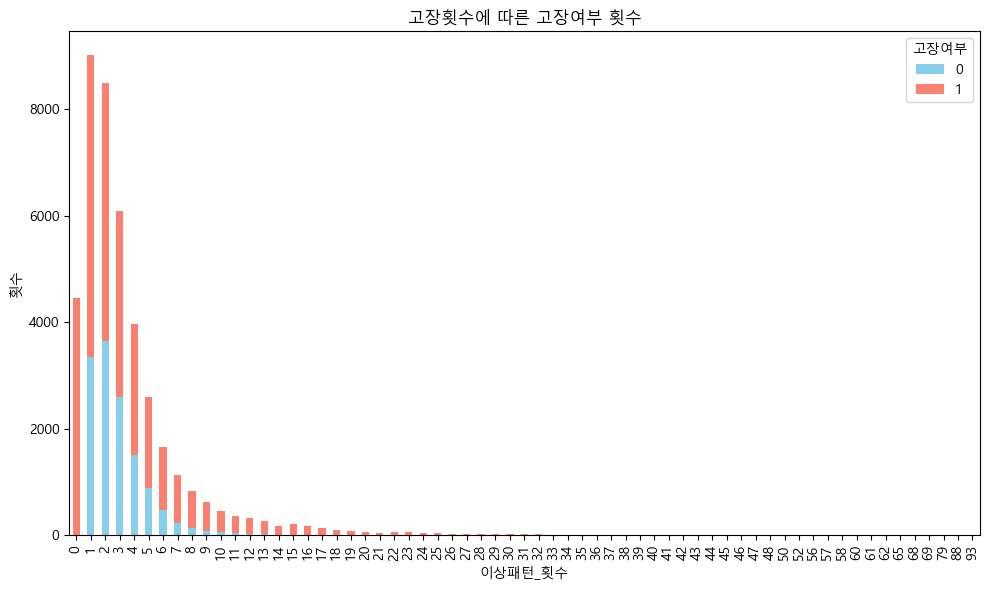

In [127]:
# 결과 시각화
result = df_Bike_latest_2.groupby('이상패턴_횟수')['고장여부'].value_counts().unstack().fillna(0)
result.plot(kind='bar', stacked=True, figsize=(10, 6), color=['skyblue', 'salmon'])
plt.xlabel('이상패턴_횟수')
plt.ylabel('횟수')
plt.title('고장횟수에 따른 고장여부 횟수')
plt.legend(title='고장여부')
plt.tight_layout()
plt.show()

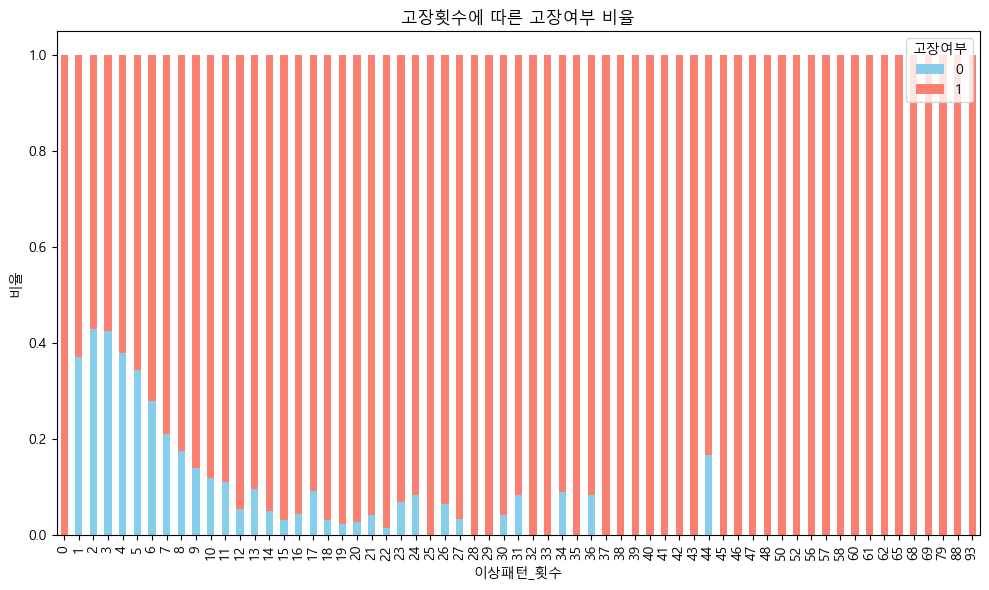

In [130]:
# 결과 시각화
result = df_Bike_latest_2.groupby('이상패턴_횟수')['고장여부'].value_counts(normalize=True).unstack().fillna(0)
#result = df_Bike_latest_2.groupby('이상패턴_횟수')['고장여부'].value_counts().unstack().fillna(0)
result.plot(kind='bar', stacked=True, figsize=(10, 6), color=['skyblue', 'salmon'])
plt.xlabel('이상패턴_횟수')
plt.ylabel('비율')
plt.title('고장횟수에 따른 고장여부 비율')
plt.legend(title='고장여부')
plt.tight_layout()
plt.show()

---
## 선형회귀 모델링

In [258]:
np.array([2, 5, 7, 2, 7]).reshape(-1, 1)

array([[2],
       [5],
       [7],
       [2],
       [7]])

In [262]:
df_Bike_latest_2.head(3)

,자전거번호,이전일자,등록대여일자,고장구분,고장여부,이상패턴_횟수
0,SPB-30006,2024-02-29,2024-03-31,페달,1,2
1,SPB-30010,2024-05-18,2024-06-18,타이어,1,5
2,SPB-30014,2024-05-24,2024-06-24,기타,1,7


In [268]:
np.array(df_Bike_latest_2['이상패턴_횟수']).reshape(-1, 1)

array([[2],
       [5],
       [7],
       ...,
       [4],
       [1],
       [3]], dtype=int64)

In [270]:
np.array(df_Bike_latest_2['고장여부'])

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

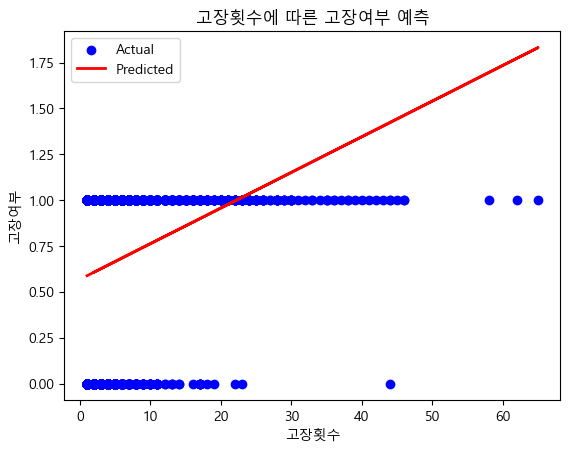

회귀 계수: [0.01942043]
절편: 0.5689119661150132


In [132]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# # 예시 데이터 생성
# # 독립 변수 (예: 고장횟수)
# X = np.array([2, 5, 7, 2, 7]).reshape(-1, 1)
# # 종속 변수 (예: 고장여부)
# y = np.array([1, 1, 1, 1, 1])

df_Bike_latest_3 = df_Bike_latest_2[df_Bike_latest_2['이상패턴_횟수'] > 0]
X = np.array(df_Bike_latest_3['이상패턴_횟수']).reshape(-1, 1)
y = np.array(df_Bike_latest_3['고장여부'])

# 데이터셋을 학습 세트와 테스트 세트로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 선형 회귀 모델 생성 및 학습
model = LinearRegression()
model.fit(X_train, y_train)

# 테스트 세트에 대한 예측
y_pred = model.predict(X_test)

# 결과 시각화
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')
plt.xlabel('고장횟수')
plt.ylabel('고장여부')
plt.title('고장횟수에 따른 고장여부 예측')
plt.legend()
plt.show()

# 회귀 계수 출력
print('회귀 계수:', model.coef_)
print('절편:', model.intercept_)

---
## 로지스틱회귀 모델링

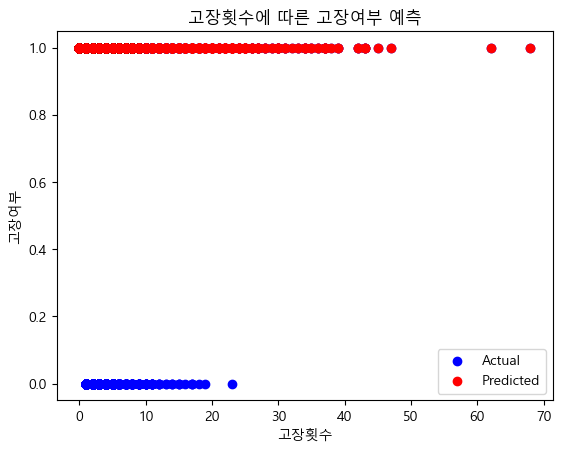

테스트 세트 정확도: 0.6854471349796212


In [134]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

# # 예시 데이터 생성
# X = np.array([2, 5, 7, 2, 7]).reshape(-1, 1)  # 고장횟수
# y = np.array([1, 1, 1, 0, 0])  # 고장여부

df_Bike_latest_3 = df_Bike_latest_2[df_Bike_latest_2['이상패턴_횟수'] > 0]
df_Bike_latest_3 = df_Bike_latest_2
X = np.array(df_Bike_latest_3['이상패턴_횟수']).reshape(-1, 1)
y = np.array(df_Bike_latest_3['고장여부'])

# 데이터셋을 학습 세트와 테스트 세트로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=444, stratify=y)

# 로지스틱 회귀 모델 생성 및 학습
model = LogisticRegression()
model.fit(X_train, y_train)

# 테스트 세트에 대한 예측
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# 결과 시각화
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, y_pred, color='red', label='Predicted')
plt.xlabel('고장횟수')
plt.ylabel('고장여부')
plt.title('고장횟수에 따른 고장여부 예측')
plt.legend()
plt.show()

# 모델 평가
print('테스트 세트 정확도:', model.score(X_test, y_test))

In [142]:
model.coef_

array([[0.0674019]])

### [ 이상패턴 횟수 == 0 ] 것들의 고장여부 비율

In [144]:
counts = df_Bike_latest_2[df_Bike_latest_2['이상패턴_횟수'] == 0]['고장여부'].value_counts()
total = counts.sum()   # 총 데이터 개수
percentage = counts / total * 100   # 비율 계산
print(f'total : {total}')
print(f'counts : {counts}')
print(f'percentage : {percentage}')

total : 4453
counts : 고장여부
1    4453
Name: count, dtype: int64
percentage : 고장여부
1    100.0
Name: count, dtype: float64


### [ 이상패턴 횟수 > 0 ] 것들의 고장여부 비율

In [146]:
counts = df_Bike_latest_2[df_Bike_latest_2['이상패턴_횟수'] > 0]['고장여부'].value_counts()
total = counts.sum()   # 총 데이터 개수
percentage = counts / total * 100   # 비율 계산
print(f'total : {total}')
print(f'counts : {counts}')
print(f'percentage : {percentage}')

total : 37257
counts : 고장여부
1    24136
0    13121
Name: count, dtype: int64
percentage : 고장여부
1    64.782457
0    35.217543
Name: count, dtype: float64
